In [43]:
import os
import sys
import numpy as np
os.environ['KERAS_BACKEND'] = "tensorflow"
import keras as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, CuDNNGRU, LSTM
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
# Force one-gpu
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

print("OS: ", sys.platform)
print("Python: ", sys.version)
print("Keras: ", K.__version__)
print("Numpy: ", np.__version__)
print("Tensorflow: ", tf.__version__)
print(K.backend.backend())


OS:  linux
Python:  3.5.5 |Anaconda custom (64-bit)| (default, May 13 2018, 21:12:35) 
[GCC 7.2.0]
Keras:  2.2.4
Numpy:  1.14.5
Tensorflow:  1.12.0
tensorflow


In [77]:
# generate fake regression dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.19, random_state=1)
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y.reshape(1000,1))
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(1000,1))

In [41]:
y.dtype

dtype('float64')

In [49]:
X.shape

(1000, 5)

In [36]:
# define and Arch 
model = Sequential()
model.add(Dense(4, input_dim=5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear')) # Last layer is linear here 
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Fit the model
history = model.fit(X, y, epochs=1000, verbose=1, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 0s 421us/step - loss: 0.2324 - mean_squared_error: 0.0768 - mean_absolute_error: 0.2324 - val_loss: 0.1459 - val_mean_squared_error: 0.0355 - val_mean_absolute_error: 0.1459
Epoch 2/1000
800/800 [==============================] - 0s 76us/step - loss: 0.1116 - mean_squared_error: 0.0201 - mean_absolute_error: 0.1116 - val_loss: 0.1109 - val_mean_squared_error: 0.0192 - val_mean_absolute_error: 0.1109
Epoch 3/1000
800/800 [==============================] - 0s 71us/step - loss: 0.1012 - mean_squared_error: 0.0158 - mean_absolute_error: 0.1012 - val_loss: 0.1066 - val_mean_squared_error: 0.0177 - val_mean_absolute_error: 0.1066
Epoch 4/1000
800/800 [==============================] - 0s 72us/step - loss: 0.0964 - mean_squared_error: 0.0145 - mean_absolute_error: 0.0964 - val_loss: 0.1011 - val_mean_squared_error: 0.0161 - val_mean_absolute_error: 0.1011
Epoch 5/1000
800/800 [===============

Epoch 70/1000
800/800 [==============================] - 0s 72us/step - loss: 8.4973e-04 - mean_squared_error: 1.3569e-05 - mean_absolute_error: 8.4973e-04 - val_loss: 6.7177e-04 - val_mean_squared_error: 9.8812e-06 - val_mean_absolute_error: 6.7177e-04
Epoch 71/1000
800/800 [==============================] - 0s 72us/step - loss: 7.2369e-04 - mean_squared_error: 1.3332e-05 - mean_absolute_error: 7.2369e-04 - val_loss: 6.8656e-04 - val_mean_squared_error: 9.5635e-06 - val_mean_absolute_error: 6.8656e-04
Epoch 72/1000
800/800 [==============================] - 0s 71us/step - loss: 7.5935e-04 - mean_squared_error: 1.2895e-05 - mean_absolute_error: 7.5935e-04 - val_loss: 6.5073e-04 - val_mean_squared_error: 9.2343e-06 - val_mean_absolute_error: 6.5073e-04
Epoch 73/1000
800/800 [==============================] - 0s 78us/step - loss: 8.3950e-04 - mean_squared_error: 1.2665e-05 - mean_absolute_error: 8.3950e-04 - val_loss: 5.9760e-04 - val_mean_squared_error: 9.0281e-06 - val_mean_absolute_er

800/800 [==============================] - 0s 70us/step - loss: 0.0011 - mean_squared_error: 2.7814e-06 - mean_absolute_error: 0.0011 - val_loss: 0.0017 - val_mean_squared_error: 3.1900e-06 - val_mean_absolute_error: 0.0017
Epoch 135/1000
800/800 [==============================] - 0s 69us/step - loss: 7.8290e-04 - mean_squared_error: 2.1053e-06 - mean_absolute_error: 7.8290e-04 - val_loss: 3.0877e-04 - val_mean_squared_error: 4.0697e-07 - val_mean_absolute_error: 3.0877e-04
Epoch 136/1000
800/800 [==============================] - 0s 70us/step - loss: 5.2007e-04 - mean_squared_error: 1.6614e-06 - mean_absolute_error: 5.2007e-04 - val_loss: 8.5452e-04 - val_mean_squared_error: 1.0269e-06 - val_mean_absolute_error: 8.5452e-04
Epoch 137/1000
800/800 [==============================] - 0s 70us/step - loss: 9.2108e-04 - mean_squared_error: 2.2202e-06 - mean_absolute_error: 9.2108e-04 - val_loss: 0.0012 - val_mean_squared_error: 1.7344e-06 - val_mean_absolute_error: 0.0012
Epoch 138/1000
800/

800/800 [==============================] - 0s 70us/step - loss: 4.7966e-04 - mean_squared_error: 5.0582e-07 - mean_absolute_error: 4.7966e-04 - val_loss: 4.8659e-04 - val_mean_squared_error: 3.2175e-07 - val_mean_absolute_error: 4.8659e-04
Epoch 199/1000
800/800 [==============================] - 0s 70us/step - loss: 5.1808e-04 - mean_squared_error: 5.4527e-07 - mean_absolute_error: 5.1808e-04 - val_loss: 5.6702e-04 - val_mean_squared_error: 4.2040e-07 - val_mean_absolute_error: 5.6702e-04
Epoch 200/1000
800/800 [==============================] - 0s 80us/step - loss: 4.5895e-04 - mean_squared_error: 4.6752e-07 - mean_absolute_error: 4.5895e-04 - val_loss: 2.8164e-04 - val_mean_squared_error: 1.2131e-07 - val_mean_absolute_error: 2.8164e-04
Epoch 201/1000
800/800 [==============================] - 0s 72us/step - loss: 5.2728e-04 - mean_squared_error: 5.4470e-07 - mean_absolute_error: 5.2728e-04 - val_loss: 2.7641e-04 - val_mean_squared_error: 1.1442e-07 - val_mean_absolute_error: 2.7641

800/800 [==============================] - 0s 71us/step - loss: 4.1630e-04 - mean_squared_error: 3.2142e-07 - mean_absolute_error: 4.1630e-04 - val_loss: 6.6818e-04 - val_mean_squared_error: 5.7353e-07 - val_mean_absolute_error: 6.6818e-04
Epoch 263/1000
800/800 [==============================] - 0s 71us/step - loss: 5.2203e-04 - mean_squared_error: 4.3757e-07 - mean_absolute_error: 5.2203e-04 - val_loss: 5.8039e-04 - val_mean_squared_error: 4.4066e-07 - val_mean_absolute_error: 5.8039e-04
Epoch 264/1000
800/800 [==============================] - 0s 74us/step - loss: 5.2722e-04 - mean_squared_error: 4.5112e-07 - mean_absolute_error: 5.2722e-04 - val_loss: 3.8300e-04 - val_mean_squared_error: 2.2495e-07 - val_mean_absolute_error: 3.8300e-04
Epoch 265/1000
800/800 [==============================] - 0s 74us/step - loss: 5.6560e-04 - mean_squared_error: 4.9579e-07 - mean_absolute_error: 5.6560e-04 - val_loss: 2.8124e-04 - val_mean_squared_error: 1.1919e-07 - val_mean_absolute_error: 2.8124

800/800 [==============================] - 0s 74us/step - loss: 5.5386e-04 - mean_squared_error: 4.2189e-07 - mean_absolute_error: 5.5386e-04 - val_loss: 5.1585e-04 - val_mean_squared_error: 3.5896e-07 - val_mean_absolute_error: 5.1585e-04
Epoch 327/1000
800/800 [==============================] - 0s 71us/step - loss: 4.1872e-04 - mean_squared_error: 2.8582e-07 - mean_absolute_error: 4.1872e-04 - val_loss: 2.6644e-04 - val_mean_squared_error: 1.1215e-07 - val_mean_absolute_error: 2.6644e-04
Epoch 328/1000
800/800 [==============================] - 0s 73us/step - loss: 4.4467e-04 - mean_squared_error: 3.0732e-07 - mean_absolute_error: 4.4467e-04 - val_loss: 4.3152e-04 - val_mean_squared_error: 2.8071e-07 - val_mean_absolute_error: 4.3152e-04
Epoch 329/1000
800/800 [==============================] - 0s 77us/step - loss: 4.5020e-04 - mean_squared_error: 3.0436e-07 - mean_absolute_error: 4.5020e-04 - val_loss: 4.7545e-04 - val_mean_squared_error: 3.1745e-07 - val_mean_absolute_error: 4.7545

800/800 [==============================] - 0s 73us/step - loss: 4.8016e-04 - mean_squared_error: 3.3319e-07 - mean_absolute_error: 4.8016e-04 - val_loss: 3.4876e-04 - val_mean_squared_error: 1.7850e-07 - val_mean_absolute_error: 3.4876e-04
Epoch 391/1000
800/800 [==============================] - 0s 76us/step - loss: 4.0414e-04 - mean_squared_error: 2.4741e-07 - mean_absolute_error: 4.0414e-04 - val_loss: 7.1698e-04 - val_mean_squared_error: 6.3223e-07 - val_mean_absolute_error: 7.1698e-04
Epoch 392/1000
800/800 [==============================] - 0s 74us/step - loss: 4.4794e-04 - mean_squared_error: 3.0659e-07 - mean_absolute_error: 4.4794e-04 - val_loss: 8.2955e-04 - val_mean_squared_error: 7.9331e-07 - val_mean_absolute_error: 8.2955e-04
Epoch 393/1000
800/800 [==============================] - 0s 72us/step - loss: 5.7022e-04 - mean_squared_error: 4.5175e-07 - mean_absolute_error: 5.7022e-04 - val_loss: 5.1961e-04 - val_mean_squared_error: 3.6845e-07 - val_mean_absolute_error: 5.1961

800/800 [==============================] - 0s 69us/step - loss: 3.6868e-04 - mean_squared_error: 2.0945e-07 - mean_absolute_error: 3.6868e-04 - val_loss: 2.7626e-04 - val_mean_squared_error: 1.1538e-07 - val_mean_absolute_error: 2.7626e-04
Epoch 455/1000
800/800 [==============================] - 0s 70us/step - loss: 3.6081e-04 - mean_squared_error: 2.0656e-07 - mean_absolute_error: 3.6081e-04 - val_loss: 8.5948e-04 - val_mean_squared_error: 8.6081e-07 - val_mean_absolute_error: 8.5948e-04
Epoch 456/1000
800/800 [==============================] - 0s 71us/step - loss: 4.6509e-04 - mean_squared_error: 3.2267e-07 - mean_absolute_error: 4.6509e-04 - val_loss: 4.7637e-04 - val_mean_squared_error: 3.1892e-07 - val_mean_absolute_error: 4.7637e-04
Epoch 457/1000
800/800 [==============================] - 0s 72us/step - loss: 3.3052e-04 - mean_squared_error: 1.7505e-07 - mean_absolute_error: 3.3052e-04 - val_loss: 2.8630e-04 - val_mean_squared_error: 1.3178e-07 - val_mean_absolute_error: 2.8630

800/800 [==============================] - 0s 71us/step - loss: 3.0184e-04 - mean_squared_error: 1.3976e-07 - mean_absolute_error: 3.0184e-04 - val_loss: 3.6318e-04 - val_mean_squared_error: 1.8875e-07 - val_mean_absolute_error: 3.6318e-04
Epoch 519/1000
800/800 [==============================] - 0s 70us/step - loss: 3.2797e-04 - mean_squared_error: 1.6466e-07 - mean_absolute_error: 3.2797e-04 - val_loss: 3.6815e-04 - val_mean_squared_error: 1.9571e-07 - val_mean_absolute_error: 3.6815e-04
Epoch 520/1000
800/800 [==============================] - 0s 71us/step - loss: 4.0541e-04 - mean_squared_error: 2.4408e-07 - mean_absolute_error: 4.0541e-04 - val_loss: 5.1511e-04 - val_mean_squared_error: 3.5354e-07 - val_mean_absolute_error: 5.1511e-04
Epoch 521/1000
800/800 [==============================] - 0s 72us/step - loss: 3.7242e-04 - mean_squared_error: 2.2094e-07 - mean_absolute_error: 3.7242e-04 - val_loss: 8.9893e-04 - val_mean_squared_error: 9.2254e-07 - val_mean_absolute_error: 8.9893

800/800 [==============================] - 0s 72us/step - loss: 4.5708e-04 - mean_squared_error: 2.9807e-07 - mean_absolute_error: 4.5708e-04 - val_loss: 4.4021e-04 - val_mean_squared_error: 2.7117e-07 - val_mean_absolute_error: 4.4021e-04
Epoch 583/1000
800/800 [==============================] - 0s 70us/step - loss: 4.7090e-04 - mean_squared_error: 3.1624e-07 - mean_absolute_error: 4.7090e-04 - val_loss: 2.6000e-04 - val_mean_squared_error: 1.0997e-07 - val_mean_absolute_error: 2.6000e-04
Epoch 584/1000
800/800 [==============================] - 0s 69us/step - loss: 4.7299e-04 - mean_squared_error: 3.3659e-07 - mean_absolute_error: 4.7299e-04 - val_loss: 3.7221e-04 - val_mean_squared_error: 2.1443e-07 - val_mean_absolute_error: 3.7221e-04
Epoch 585/1000
800/800 [==============================] - 0s 69us/step - loss: 4.5769e-04 - mean_squared_error: 3.0748e-07 - mean_absolute_error: 4.5769e-04 - val_loss: 5.1638e-04 - val_mean_squared_error: 3.4762e-07 - val_mean_absolute_error: 5.1638

800/800 [==============================] - 0s 77us/step - loss: 5.3401e-04 - mean_squared_error: 4.2745e-07 - mean_absolute_error: 5.3401e-04 - val_loss: 2.6479e-04 - val_mean_squared_error: 1.1286e-07 - val_mean_absolute_error: 2.6479e-04
Epoch 647/1000
800/800 [==============================] - 0s 72us/step - loss: 4.9850e-04 - mean_squared_error: 3.5836e-07 - mean_absolute_error: 4.9850e-04 - val_loss: 8.4180e-04 - val_mean_squared_error: 8.2129e-07 - val_mean_absolute_error: 8.4180e-04
Epoch 648/1000
800/800 [==============================] - 0s 72us/step - loss: 3.7862e-04 - mean_squared_error: 2.2777e-07 - mean_absolute_error: 3.7862e-04 - val_loss: 2.6313e-04 - val_mean_squared_error: 1.1161e-07 - val_mean_absolute_error: 2.6313e-04
Epoch 649/1000
800/800 [==============================] - 0s 70us/step - loss: 5.1493e-04 - mean_squared_error: 3.7927e-07 - mean_absolute_error: 5.1493e-04 - val_loss: 3.7372e-04 - val_mean_squared_error: 2.0012e-07 - val_mean_absolute_error: 3.7372

800/800 [==============================] - 0s 70us/step - loss: 4.4983e-04 - mean_squared_error: 2.9316e-07 - mean_absolute_error: 4.4983e-04 - val_loss: 2.6623e-04 - val_mean_squared_error: 1.1315e-07 - val_mean_absolute_error: 2.6623e-04
Epoch 711/1000
800/800 [==============================] - 0s 69us/step - loss: 4.0952e-04 - mean_squared_error: 2.5236e-07 - mean_absolute_error: 4.0952e-04 - val_loss: 4.4404e-04 - val_mean_squared_error: 2.8822e-07 - val_mean_absolute_error: 4.4404e-04
Epoch 712/1000
800/800 [==============================] - 0s 72us/step - loss: 4.7771e-04 - mean_squared_error: 3.6431e-07 - mean_absolute_error: 4.7771e-04 - val_loss: 5.6092e-04 - val_mean_squared_error: 4.1580e-07 - val_mean_absolute_error: 5.6092e-04
Epoch 713/1000
800/800 [==============================] - 0s 71us/step - loss: 4.5762e-04 - mean_squared_error: 3.1066e-07 - mean_absolute_error: 4.5762e-04 - val_loss: 7.0472e-04 - val_mean_squared_error: 6.0360e-07 - val_mean_absolute_error: 7.0472

800/800 [==============================] - 0s 72us/step - loss: 3.4359e-04 - mean_squared_error: 1.8173e-07 - mean_absolute_error: 3.4359e-04 - val_loss: 3.2387e-04 - val_mean_squared_error: 1.7029e-07 - val_mean_absolute_error: 3.2387e-04
Epoch 775/1000
800/800 [==============================] - 0s 73us/step - loss: 3.8854e-04 - mean_squared_error: 2.3338e-07 - mean_absolute_error: 3.8854e-04 - val_loss: 2.8413e-04 - val_mean_squared_error: 1.3791e-07 - val_mean_absolute_error: 2.8413e-04
Epoch 776/1000
800/800 [==============================] - 0s 73us/step - loss: 4.6011e-04 - mean_squared_error: 3.1230e-07 - mean_absolute_error: 4.6011e-04 - val_loss: 2.6563e-04 - val_mean_squared_error: 1.0952e-07 - val_mean_absolute_error: 2.6563e-04
Epoch 777/1000
800/800 [==============================] - 0s 71us/step - loss: 5.0597e-04 - mean_squared_error: 3.5977e-07 - mean_absolute_error: 5.0597e-04 - val_loss: 2.7850e-04 - val_mean_squared_error: 1.1481e-07 - val_mean_absolute_error: 2.7850

800/800 [==============================] - 0s 73us/step - loss: 4.9702e-04 - mean_squared_error: 3.3845e-07 - mean_absolute_error: 4.9702e-04 - val_loss: 5.3584e-04 - val_mean_squared_error: 3.7415e-07 - val_mean_absolute_error: 5.3584e-04
Epoch 839/1000
800/800 [==============================] - 0s 75us/step - loss: 4.9242e-04 - mean_squared_error: 3.6173e-07 - mean_absolute_error: 4.9242e-04 - val_loss: 2.6229e-04 - val_mean_squared_error: 1.0671e-07 - val_mean_absolute_error: 2.6229e-04
Epoch 840/1000
800/800 [==============================] - 0s 74us/step - loss: 3.2888e-04 - mean_squared_error: 1.6489e-07 - mean_absolute_error: 3.2888e-04 - val_loss: 3.4983e-04 - val_mean_squared_error: 1.9308e-07 - val_mean_absolute_error: 3.4983e-04
Epoch 841/1000
800/800 [==============================] - 0s 73us/step - loss: 4.9463e-04 - mean_squared_error: 3.7792e-07 - mean_absolute_error: 4.9463e-04 - val_loss: 3.2404e-04 - val_mean_squared_error: 1.5723e-07 - val_mean_absolute_error: 3.2404

800/800 [==============================] - 0s 73us/step - loss: 3.4629e-04 - mean_squared_error: 1.8636e-07 - mean_absolute_error: 3.4629e-04 - val_loss: 4.9074e-04 - val_mean_squared_error: 3.2474e-07 - val_mean_absolute_error: 4.9074e-04
Epoch 903/1000
800/800 [==============================] - 0s 74us/step - loss: 5.5828e-04 - mean_squared_error: 4.7928e-07 - mean_absolute_error: 5.5828e-04 - val_loss: 3.0022e-04 - val_mean_squared_error: 1.4083e-07 - val_mean_absolute_error: 3.0022e-04
Epoch 904/1000
800/800 [==============================] - 0s 71us/step - loss: 6.9161e-04 - mean_squared_error: 6.8249e-07 - mean_absolute_error: 6.9161e-04 - val_loss: 5.3343e-04 - val_mean_squared_error: 3.9122e-07 - val_mean_absolute_error: 5.3343e-04
Epoch 905/1000
800/800 [==============================] - 0s 72us/step - loss: 9.9724e-04 - mean_squared_error: 1.2291e-06 - mean_absolute_error: 9.9724e-04 - val_loss: 0.0011 - val_mean_squared_error: 1.3929e-06 - val_mean_absolute_error: 0.0011
Epo

800/800 [==============================] - 0s 72us/step - loss: 5.3039e-04 - mean_squared_error: 4.0476e-07 - mean_absolute_error: 5.3039e-04 - val_loss: 4.7549e-04 - val_mean_squared_error: 3.0986e-07 - val_mean_absolute_error: 4.7549e-04
Epoch 967/1000
800/800 [==============================] - 0s 72us/step - loss: 5.2343e-04 - mean_squared_error: 3.8355e-07 - mean_absolute_error: 5.2343e-04 - val_loss: 2.8081e-04 - val_mean_squared_error: 1.2467e-07 - val_mean_absolute_error: 2.8081e-04
Epoch 968/1000
800/800 [==============================] - 0s 77us/step - loss: 3.5550e-04 - mean_squared_error: 1.9898e-07 - mean_absolute_error: 3.5550e-04 - val_loss: 2.6712e-04 - val_mean_squared_error: 1.1692e-07 - val_mean_absolute_error: 2.6712e-04
Epoch 969/1000
800/800 [==============================] - 0s 75us/step - loss: 4.4717e-04 - mean_squared_error: 3.0120e-07 - mean_absolute_error: 4.4717e-04 - val_loss: 2.8241e-04 - val_mean_squared_error: 1.2381e-07 - val_mean_absolute_error: 2.8241

dict_keys(['val_mean_absolute_error', 'val_loss', 'loss', 'mean_squared_error', 'val_mean_squared_error', 'mean_absolute_error'])


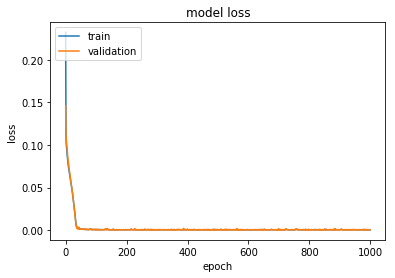

In [39]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# RNN/LSTM

In [94]:
# Data must be reshaped into 3D to be feed into the LSTM layer
ourdata = X.reshape((1, 1000, 5)) #reshaping the numpy array
label = y.reshape((1, 1000, 1))
input_shape = y.shape


In [95]:
input_shape

(1000, 1)

In [96]:
# define and Arch 
model = Sequential()
model.add(LSTM(32, input_shape=(1000, 5))) #50 is timesteps, 2 is the number of features we have
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear')) # Last layer is linear here 
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])


In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 32)                4864      
_________________________________________________________________
dense_55 (Dense)             (None, 12)                396       
_________________________________________________________________
dense_56 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 5         
Total params: 5,317
Trainable params: 5,317
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(ourdata, label, epochs=100, verbose=1, validation_split=0.2)

ValueError: Error when checking target: expected dense_57 to have 2 dimensions, but got array with shape (1, 1000, 1)